#  Combining the masks

In [1]:
import os
import glob
import numpy as np
import SimpleITK as sitk
from collections import defaultdict

def binarize_mask(mask):
    """Convert any non-zero value to 1."""
    array = sitk.GetArrayFromImage(mask)
    array = (array > 0).astype(np.uint8)
    return sitk.GetImageFromArray(array, isVector=False)

def combine_masks_for_patient(mask_paths):
    """
    Combine multiple binary masks into one.
    """
    combined = None
    for path in mask_paths:
        mask = sitk.ReadImage(path)
        binary = binarize_mask(mask)

        if combined is None:
            combined = binary
        else:
            combined = sitk.Or(combined, binary)

    return combined

def process_annotation_folder(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    all_files = glob.glob(os.path.join(input_dir, "*.nii.gz"))

    # Group files by patient ID
    patient_dict = defaultdict(list)
    for path in all_files:
        basename = os.path.basename(path)
        patient_id = basename.split("_")[0]  # 'LNDb-0001'
        patient_dict[patient_id].append(path)

    # Process each patient
    for patient_id, files in patient_dict.items():
        combined_mask = combine_masks_for_patient(files)

        # Preserve original spacing/origin from first file
        ref_image = sitk.ReadImage(files[0])
        combined_mask.CopyInformation(ref_image)

        out_path = os.path.join(output_dir, f"{patient_id}_combined.nii.gz")
        sitk.WriteImage(combined_mask, out_path)
        print(f"Saved combined mask: {out_path}")

# Example usage:
input_mask_dir = "/NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_nifti/"
output_combined_dir = "/NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/"
process_annotation_folder(input_mask_dir, output_combined_dir)


Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0113_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0265_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0011_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0101_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0304_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0060_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0171_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0010_combined.nii.gz
Saved combined mask: /NAS/shared

Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0267_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0013_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0161_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0274_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0110_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0247_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0152_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0248_combined.nii.gz
Saved combined mask: /NAS/shared

Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0167_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0168_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0272_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0175_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0016_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0262_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0106_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0068_combined.nii.gz
Saved combined mask: /NAS/shared

Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0165_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0311_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0075_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0104_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0091_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0298_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0081_combined.nii.gz
Saved combined mask: /NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/LNDb-0116_combined.nii.gz
Saved combined mask: /NAS/shared

## NoduleSpplit


In [5]:
import pandas as pd
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# === Radiology-Style Clinical Summary Table: NSCLC Dataset with Staging and Nodule Metrics ===
import pandas as pd
import numpy as np
from tabulate import tabulate
import os
import json
import numpy as np
import pandas as pd
import SimpleITK as sitk
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
from scipy.ndimage import label, binary_dilation,binary_erosion
import SimpleITK as sitk
import numpy as np
import scipy.ndimage as ndi


# Load NIfTI images using SimpleITK
def load_nifti(file_path):
    img   = sitk.ReadImage(file_path)
    array = sitk.GetArrayFromImage(img)
    return img, array

# Save NIfTI images using SimpleITK
def save_nifti(array, reference_img, output_path):
    updated_img = sitk.GetImageFromArray(array)
    updated_img.CopyInformation(reference_img)  # Keep original metadata
    sitk.WriteImage(updated_img, output_path)
    
    
def get_body_mask(ct_image_path, threshold=-300):
    """
    Generate a binary mask of the body from a CT scan.
    
    Args:
        ct_image (sitk.Image): 3D CT image path
        threshold (int): Hounsfield Unit threshold to separate air/background from body (typical: -300)

    Returns:
        sitk.Image: Binary mask (1 = body, 0 = background)
    """
    ct_image = sitk.ReadImage(ct_image_path)
    # Step 1: Thresholding (e.g., air is usually below -500 HU)
    binary = sitk.BinaryThreshold(ct_image, lowerThreshold=threshold, upperThreshold=3071, insideValue=1, outsideValue=0)

    # Step 2: Remove small air pockets inside the body using connected components
    # Use largest connected component to eliminate isolated noise
    cc = sitk.ConnectedComponent(binary)
    stats = sitk.LabelShapeStatisticsImageFilter()
    stats.Execute(cc)
    
    largest_label = max(stats.GetLabels(), key=lambda l: stats.GetPhysicalSize(l))
    body_mask = sitk.BinaryThreshold(cc, lowerThreshold=largest_label, upperThreshold=largest_label, insideValue=1, outsideValue=0)

    # Step 3: Fill holes inside the body mask (optional, improves quality)
    body_mask = sitk.VotingBinaryHoleFilling(body_mask, radius=[2]*3, majorityThreshold=1)
    body_img = sitk.GetArrayFromImage(body_mask)

    return body_img




Vista3D_segmenation_path   = '/NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/vista3Dauto_seg/'
org_segmenation_path       = '/NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_masks_UNION_nifti/'
psedo_Segmentation_path    = '/NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/vista3Dauto_seg_UNION_orgGTV/'
data_root_path             = '/NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/'



segmented_data              = [f for f in os.listdir(org_segmenation_path) if f.endswith('.nii.gz')]
segmented_data_df           = pd.DataFrame(list(segmented_data),columns=['LNDbv4_masks_UNION_nifti'])
segmented_data_df['LNDbID'] = segmented_data_df['LNDbv4_masks_UNION_nifti'].str.split('_combined.nii.gz').str[0].str.split('-').str[-1]
segmented_data_df['LNDbID'] = segmented_data_df['LNDbID'].astype(int)
segmented_data_df['Vista3DSegNifti'] = segmented_data_df['LNDbv4_masks_UNION_nifti'].str.split('_combined.nii.gz').str[0]+'_seg.nii.gz'
segmented_data_df   = segmented_data_df[['LNDbID','LNDbv4_masks_UNION_nifti','Vista3DSegNifti']]


# Unique patient IDs
unique_ids = segmented_data_df['LNDbID'].unique()
train_ids, temp_ids = train_test_split(unique_ids, test_size=0.2, random_state=42)
val_ids, test_ids = train_test_split(temp_ids, test_size=0.5, random_state=42)

# Assign split
def assign_split(row):
    if row['LNDbID'] in train_ids:
        return 'Train'
    elif row['LNDbID'] in val_ids:
        return 'Validation'
    elif row['LNDbID'] in test_ids:
        return 'Test'
    else:
        return 'unknown'

segmented_data_df['fitSplit'] = segmented_data_df.apply(assign_split, axis=1)
error=[]

for idx, segNifti in enumerate(segmented_data_df['Vista3DSegNifti'].tolist()):
    
    pseudo_img, pseudo_array    = load_nifti(Vista3D_segmenation_path+segNifti)
    org_segfile_name            = segmented_data_df['LNDbv4_masks_UNION_nifti'][idx]
    org_img,    org_array       = load_nifti(org_segmenation_path+org_segfile_name)
    pseudo_array[org_array==1]  = 23
    body_array = get_body_mask('/NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_cts_nifti/'+segNifti.split('_seg.nii.gz')[0]+'.nii.gz', threshold=-300)
    pseudo_array[(body_array != 0) & (pseudo_array == 0)] = 200
    out_put_save_path = psedo_Segmentation_path+segNifti.split('_seg.nii.gz')[0]+'_seg_sh.nii.gz' 
    save_nifti(pseudo_array, pseudo_img, out_put_save_path)
    print('{}|Reading|{}|Split|{}'.format(idx+1,segNifti,segmented_data_df['fitSplit'][idx]))



1|Reading|LNDb-0222_seg.nii.gz|Split|Train
2|Reading|LNDb-0018_seg.nii.gz|Split|Train
3|Reading|LNDb-0039_seg.nii.gz|Split|Train
4|Reading|LNDb-0114_seg.nii.gz|Split|Train
5|Reading|LNDb-0311_seg.nii.gz|Split|Train
6|Reading|LNDb-0156_seg.nii.gz|Split|Train
7|Reading|LNDb-0092_seg.nii.gz|Split|Train
8|Reading|LNDb-0297_seg.nii.gz|Split|Train
9|Reading|LNDb-0044_seg.nii.gz|Split|Train
10|Reading|LNDb-0169_seg.nii.gz|Split|Test
11|Reading|LNDb-0180_seg.nii.gz|Split|Validation
12|Reading|LNDb-0148_seg.nii.gz|Split|Train
13|Reading|LNDb-0260_seg.nii.gz|Split|Train
14|Reading|LNDb-0289_seg.nii.gz|Split|Train
15|Reading|LNDb-0065_seg.nii.gz|Split|Train
16|Reading|LNDb-0104_seg.nii.gz|Split|Test
17|Reading|LNDb-0301_seg.nii.gz|Split|Test
18|Reading|LNDb-0213_seg.nii.gz|Split|Train
19|Reading|LNDb-0016_seg.nii.gz|Split|Test
20|Reading|LNDb-0037_seg.nii.gz|Split|Test
21|Reading|LNDb-0232_seg.nii.gz|Split|Train
22|Reading|LNDb-0008_seg.nii.gz|Split|Train
23|Reading|LNDb-0270_seg.nii.gz|Split|Tra

184|Reading|LNDb-0308_seg.nii.gz|Split|Train
185|Reading|LNDb-0113_seg.nii.gz|Split|Test
186|Reading|LNDb-0001_seg.nii.gz|Split|Train
187|Reading|LNDb-0151_seg.nii.gz|Split|Train
188|Reading|LNDb-0095_seg.nii.gz|Split|Train
189|Reading|LNDb-0290_seg.nii.gz|Split|Train
190|Reading|LNDb-0279_seg.nii.gz|Split|Train
191|Reading|LNDb-0043_seg.nii.gz|Split|Validation
192|Reading|LNDb-0246_seg.nii.gz|Split|Train
193|Reading|LNDb-0267_seg.nii.gz|Split|Test
194|Reading|LNDb-0062_seg.nii.gz|Split|Train
195|Reading|LNDb-0258_seg.nii.gz|Split|Train
196|Reading|LNDb-0103_seg.nii.gz|Split|Train
197|Reading|LNDb-0011_seg.nii.gz|Split|Train
198|Reading|LNDb-0235_seg.nii.gz|Split|Train
199|Reading|LNDb-0122_seg.nii.gz|Split|Train
200|Reading|LNDb-0277_seg.nii.gz|Split|Train
201|Reading|LNDb-0072_seg.nii.gz|Split|Validation
202|Reading|LNDb-0189_seg.nii.gz|Split|Train
203|Reading|LNDb-0248_seg.nii.gz|Split|Train
204|Reading|LNDb-0085_seg.nii.gz|Split|Train
205|Reading|LNDb-0280_seg.nii.gz|Split|Test
206

In [6]:
segmented_data_df.to_csv('LNDbv4_masks_UNION_dataset.csv',index=False, encoding='utf-8')

# Creating Embadding Json

In [7]:
import os 
import json

data_dir = '/NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/vista3Dauto_seg_UNION_orgGTV/'

nifti_List = [f for f in os.listdir(data_dir) if f.endswith('.nii.gz')]
nifti_data_dict={}
training_nifti_lst = []


for ct in nifti_List:
    training_nifti_lst.append({"image": "LNDbv4_512xy_256z_771p25m/"+ct.split('_seg_sh.nii.gz')[0]+'.nii.gz'})

training_nifti_lst


dataset_dict = {
    "name": "Experiments_LNDbv4_512xy_256z_111p25m",
    "description": "LNDbv4_ct_nifti Dataset",
    "tensorImageSize": "3D",
    "file_ending": ".nii.gz",
    "channel_names": {
        "0": "CT"
    },

    "numTraining": len(training_nifti_lst),
    "training": training_nifti_lst

}

with open("LNDbv4_512xy_256z_771p25m.json","w") as f:
    json.dump(dataset_dict,f, indent=4)

# Benign Malignant

In [3]:
# === Radiology-Style Clinical Summary Table: NSCLC Dataset with Staging and Nodule Metrics ===
import pandas as pd
import numpy as np
from tabulate import tabulate
import os
import json
import numpy as np
import pandas as pd
import SimpleITK as sitk
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
# === Radiology-Style Clinical Summary Table: NSCLC Dataset with Staging and Nodule Metrics ===
import pandas as pd
import numpy as np
from tabulate import tabulate
import os
import json
import numpy as np
import pandas as pd
import SimpleITK as sitk
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
from scipy.ndimage import label, binary_dilation,binary_erosion
import SimpleITK as sitk
import numpy as np
import scipy.ndimage as ndi

# Load NIfTI images using SimpleITK
def load_nifti(file_path):
    img   = sitk.ReadImage(file_path)
    array = sitk.GetArrayFromImage(img)
    return img, array

# Save NIfTI images using SimpleITK
def save_nifti(array, reference_img, output_path):
    updated_img = sitk.GetImageFromArray(array)
    updated_img.CopyInformation(reference_img)  # Keep original metadata
    sitk.WriteImage(updated_img, output_path)

# Combine clinical metadata
LNDbv4_df_all                = pd.read_csv('/data/usr/ft42/CVIT_XAI/LungRADS_Modeling/CLARITY/MAIASI_DatasetGen/metadata_scr/LNDbv4_masks_UNION_dataset.csv')
LNDbv4_df_all                = LNDbv4_df_all.drop_duplicates(subset='LNDbID', keep='first').reset_index(drop=True)
LNDbv4_df_all['PatientID'] = LNDbv4_df_all['Vista3DSegNifti'].str.split('_').str[0]

LNDbv4_embadding_seg = pd.read_csv('/data/usr/ft42/CVIT_XAI/LungRADS_Modeling/CLARITY/MAIASI_DatasetGen/metadata_scr/LNDbv4_vista3Dauto_seg_plus_orgGT_512xy_256z_771p25m.csv')
LNDbv4_embadding_seg = LNDbv4_embadding_seg.merge(LNDbv4_df_all,on='PatientID',how='left')
LNDbv4_embadding_seg




LNDbv4_Resampled_spacing              = pd.read_csv('/data/usr/ft42/CVIT_XAI/LungRADS_Modeling/CLARITY/MAIASI_DatasetGen/metadata_scr/LNDbv4_512xy_256z_771p25m_SpaingSize_info.csv')
LNDbv4_Resampled_spacing['PatientID'] = LNDbv4_Resampled_spacing['filename'].str.split('.nii').str[0]
reject_ct                             = LNDbv4_Resampled_spacing[LNDbv4_Resampled_spacing['x_size']!=512]['PatientID'].tolist() +  LNDbv4_Resampled_spacing[LNDbv4_Resampled_spacing['y_size']!=512]['PatientID'].tolist() + LNDbv4_Resampled_spacing[LNDbv4_Resampled_spacing['z_size']!=256]['PatientID'].tolist()
LNDbv4_embadding_seg                  = LNDbv4_embadding_seg[~LNDbv4_embadding_seg['PatientID'].isin(reject_ct)].reset_index(drop=True)



In [4]:
LNDbv4_embadding_seg

,PatientID,Embadding,Seg_nodule,LNDbID,LNDbv4_masks_UNION_nifti,Vista3DSegNifti,fitSplit
0,LNDb-0001,LNDb-0001_emb.nii.gz,LNDb-0001_seg_sh.nii.gz,1,LNDb-0001_combined.nii.gz,LNDb-0001_seg.nii.gz,Train
1,LNDb-0002,LNDb-0002_emb.nii.gz,LNDb-0002_seg_sh.nii.gz,2,LNDb-0002_combined.nii.gz,LNDb-0002_seg.nii.gz,Train
2,LNDb-0003,LNDb-0003_emb.nii.gz,LNDb-0003_seg_sh.nii.gz,3,LNDb-0003_combined.nii.gz,LNDb-0003_seg.nii.gz,Train
3,LNDb-0004,LNDb-0004_emb.nii.gz,LNDb-0004_seg_sh.nii.gz,4,LNDb-0004_combined.nii.gz,LNDb-0004_seg.nii.gz,Train
4,LNDb-0005,LNDb-0005_emb.nii.gz,LNDb-0005_seg_sh.nii.gz,5,LNDb-0005_combined.nii.gz,LNDb-0005_seg.nii.gz,Train
...,...,...,...,...,...,...,...
226,LNDb-0308,LNDb-0308_emb.nii.gz,LNDb-0308_seg_sh.nii.gz,308,LNDb-0308_combined.nii.gz,LNDb-0308_seg.nii.gz,Train
227,LNDb-0309,LNDb-0309_emb.nii.gz,LNDb-0309_seg_sh.nii.gz,309,LNDb-0309_combined.nii.gz,LNDb-0309_seg.nii.gz,Train
228,LNDb-0310,LNDb-0310_emb.nii.gz,LNDb-0310_seg_sh.nii.gz,310,LNDb-0310_combined.nii.gz,LNDb-0310_seg.nii.gz,Train
229,LNDb-0311,LNDb-0311_emb.nii.gz,LNDb-0311_seg_sh.nii.gz,311,LNDb-0311_combined.nii.gz,LNDb-0311_seg.nii.gz,Train


# ALL NODULE ANNOTATION

LNDbv4_cts_nifti_resampled/LNDb-0125.nii.gz
|------------------------------ No=1 ------------------------------|


Loading the Image:1
Number of Annotations:2


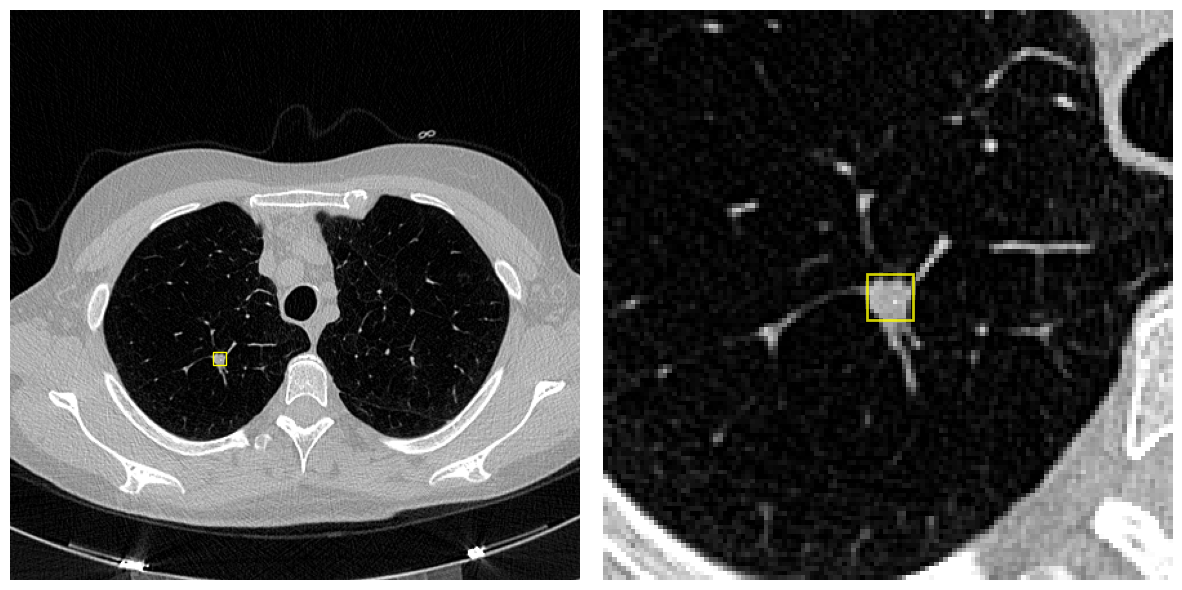

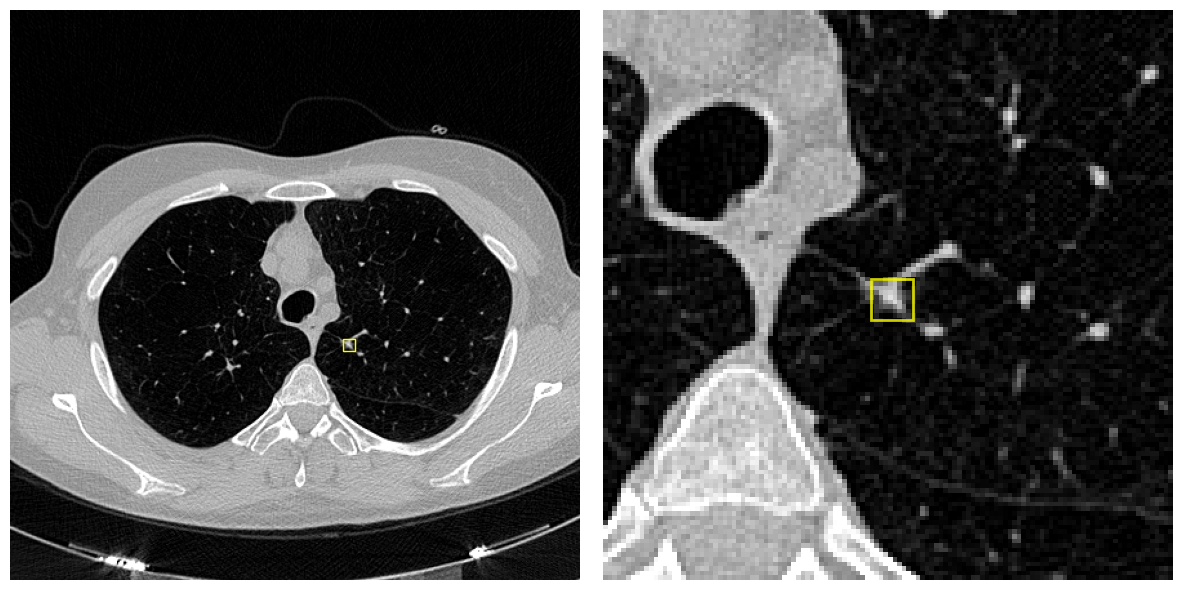

In [3]:
import pandas as pd
import numpy as np
import os


allNodules = pd.read_csv('allNods.csv')



LNDbv4_cts_nifti_resampled_dataset_list = os.listdir('/NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_cts_nifti_resampled/')
LNDbv4_cts_nifti_resampled_dataset_list

LNDbv4_cts_df = pd.DataFrame({'nifti_image':LNDbv4_cts_nifti_resampled_dataset_list})
LNDbv4_cts_df['detection_ct_path']  = 'LNDbv4_cts_nifti_resampled/'+LNDbv4_cts_df['nifti_image']
print(LNDbv4_cts_df['detection_ct_path'][0])
LNDbv4_cts_df['patientID'] = LNDbv4_cts_df['nifti_image'].str.split('-').str[-1].str.split('.nii.gz').str[0]
LNDbv4_cts_df['LNDbID'] = LNDbv4_cts_df['patientID'].astype(int)
LNDbv4_cts_df


allNodules_filtered = allNodules[allNodules['LNDbID'].isin(LNDbv4_cts_df['LNDbID'].tolist())].reset_index(drop=True)
allNodules_filtered = allNodules_filtered.dropna(subset=['x', 'y','z','DiamEq_Rad']).reset_index(drop=True)

allNodules_filtered["coordX"] = allNodules_filtered["x"]
allNodules_filtered["coordY"] = allNodules_filtered["y"]
allNodules_filtered["coordZ"] = allNodules_filtered["z"]
allNodules_filtered["w"] = allNodules_filtered["DiamEq_Rad"]
allNodules_filtered["h"] = allNodules_filtered["DiamEq_Rad"]
allNodules_filtered["d"] = allNodules_filtered["DiamEq_Rad"]

allNodules_filtered = allNodules_filtered.merge(LNDbv4_cts_df,on ='LNDbID',how='left')
allNodules_filtered = allNodules_filtered[allNodules_filtered['Nodule']!='0'].reset_index(drop=True)


#-| Import libraries

import numpy as np
import SimpleITK as sitk
import csv
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import math 
import pandas as pd
import numpy.ma as ma

##################################---Functions-------------#######################

def make_bold(text):
    return f"\033[1m{text}\033[0m"

#-| this function load an image using simpleITK and return 
#-|3D array, origin_numpy and spacing numpy
def load_itk_image(filename):
    '''
    this function load an image using simpleITK and return
    3D array, origin_numpy and spacing numpy
    input:  filename     = nifty CT image path eg."./CT_CTGRAV_TMP404180_4.nii.gz"
    output: numpyImage   = 3D CT numpy as slice X height x Width (z,y,x)
            numpyOrigin  = (z_origin,  y_origin,  x_origin)
            numpySpacing = (z_Spacing, y_Spacing, x_Spacing)
    '''
    itkimage = sitk.ReadImage(filename)           # load the ct image
    numpyImage = sitk.GetArrayFromImage(itkimage) # give CT to 3D numpy (z,y,x)
   
    #- When we load get the  itkimage.GetOrigin/GetSpacing it 
    # returns the array in order (x_origin, y_origin,z_origin)
    # as we loaded the CT image as 3D numpy (z,y,x) that is why
    # we also reversed the acquired spacing and origin
    numpyOrigin = np.array(list(reversed(itkimage.GetOrigin())))   # 3D numpy (z_origin,  y_origin,  x_origin)
    numpySpacing = np.array(list(reversed(itkimage.GetSpacing()))) # 3D numpy (z_Spacing, y_Spacing, x_Spacing)
    return numpyImage, numpyOrigin, numpySpacing

#-| this function will convert the world coordinate to the voxel coordinate
 #-|to visualize or acquired the bounding boxex on the 3D CT 
def worldToVoxelCoord(worldCoord, origin, spacing):
    stretchedVoxelCoord = np.absolute(worldCoord - origin)
    voxelCoord = stretchedVoxelCoord / spacing
    return voxelCoord

def normalize_image_to_uint8(image, lower_bound=-1000, upper_bound=500.0):
    """
    Clip the image to the lung window, then normalize it to uint8.
    Args:
        image: numpy array
        lower_bound: lower HU bound for the lung window (default: -1500 HU)
        upper_bound: upper HU bound for the lung window (default: -500 HU)
    """
    # Clip to lung window
    clipped_img = np.clip(image, lower_bound, upper_bound)
    
    # Normalize to [0, 255]
    normalized_img = ((clipped_img - lower_bound) / (upper_bound - lower_bound)) * 255.0
    normalized_img = normalized_img.astype(np.uint8)
    
    return normalized_img

def is_number_in_range(number, start, end):
    """
    Check if the number is within the range [start, end] (inclusive).
    
    Args:
    number (int/float): The number to check.
    start (int/float): The start of the range.
    end (int/float): The end of the range.
    
    Returns:
    bool: True if the number is within the range, False otherwise.
    """
    return start <= number <= end

#--------------- Reading CSV files--------------#
# Load the first CSV file
segValue      = 1
predM          = allNodules_filtered


raw_data_path = '/NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_cts_nifti_resampled'
#-| Import libraries

list_problematic_cases = []

# Get unique seriesuid values from the first CSV file
Final_dect = predM['LNDbID'].unique()

#- Demo running for only one sample due to github limitations
for dictonary_list_i in range(0, 1):#len(Final_dect)):
    
    print(make_bold('|' + '-'*30 + ' No={} '.format(dictonary_list_i+1) + '-'*30 + '|'))
    print('\n')

    desired_value      = Final_dect[dictonary_list_i]  # Get the seriesuid
    filtered_dpredM    = predM[predM['LNDbID'] == desired_value]
    example_dictionary = filtered_dpredM.reset_index()


    # Load the CT image
    print('Loading the Image:{}'.format(example_dictionary['LNDbID'][0]))
    print('Number of Annotations:{}'.format(len(example_dictionary)))



    filename    = example_dictionary['nifti_image'][0]
    ct_path     = os.path.join(raw_data_path, filename)

    ct_image  = sitk.ReadImage(ct_path)
    ct_array  = sitk.GetArrayFromImage(ct_image)
    spacing   = np.array(ct_image.GetSpacing()) # (x, y, z)
    origin    = np.array(ct_image.GetOrigin())
    direction = np.array(ct_image.GetDirection()).reshape(3, 3)

    for Which_box_to_use in range(0, len(example_dictionary)):

        #---------GT---Part
        worldCoord_gt = np.asarray([float(example_dictionary["coordX"][Which_box_to_use]), float(example_dictionary["coordY"][Which_box_to_use]), float(example_dictionary["coordZ"][Which_box_to_use])])
        voxelCoord_gt = ct_image.TransformPhysicalPointToIndex(worldCoord_gt)

        size_mm       = np.asarray([float(example_dictionary["w"][Which_box_to_use]), float(example_dictionary["h"][Which_box_to_use]), float(example_dictionary["d"][Which_box_to_use])])
        size          = size_mm // spacing[[0, 1, 2]]






        #--- Getting the bounding box start and end of the X (width)
        gtstart_x = int(voxelCoord_gt[0] - (size[0]//2))
        gtend_x   = int(voxelCoord_gt[0] + (size[0]//2))

        #--- Getting the bounding box start and end of the y
        gtstart_y = int(voxelCoord_gt[1] - (size[1]//2))
        gtend_y   = int(voxelCoord_gt[1] + (size[1]//2))

        #--- Getting the bounding box start and end of the z
        gtstart_z = int(voxelCoord_gt[2] - (size[2]//2))
        gtend_z   = int(voxelCoord_gt[2] + (size[2]//2))

        gtdraw_box_z = int(voxelCoord_gt[2])  # the z-slice we will visualize
        draw_img     = normalize_image_to_uint8(ct_array[gtdraw_box_z, :, :])
        #draw_img     = cv2.cvtColor(draw_img, cv2.COLOR_GRAY2BGR)


        # Create a figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        # Plot the full CT slice in the first subplot
        ax1.imshow(draw_img,  cmap='gray')

        ax1.add_patch(plt.Rectangle((gtstart_x, gtstart_y), 
                                    int(size[0]), 
                                    int(size[1]), fill=False, edgecolor='yellow', linewidth=1, alpha=1))
        #ax1.set_title('Full CT Slice')
        ax1.axis('off')

        # Extract a 32x32x32 cube around the bounding box
        cube_size = 124

        z_start = max(0, int(voxelCoord_gt[2]) - cube_size // 2)
        z_end   = min(ct_array.shape[0], z_start + cube_size)

        y_start = max(0, int(voxelCoord_gt[1]) - cube_size // 2)
        y_end   = min(ct_array.shape[1], y_start + cube_size)

        x_start = max(0, int(voxelCoord_gt[0]) - cube_size // 2)
        x_end   = min(ct_array.shape[2], x_start + cube_size)

        # Ensure the cube is 32x32x32 by padding if necessary
        cube = ct_array[z_start:z_end, y_start:y_end, x_start:x_end]
        if cube.shape != (cube_size, cube_size, cube_size):
            pad_z = max(0, cube_size - cube.shape[0])
            pad_y = max(0, cube_size - cube.shape[1])
            pad_x = max(0, cube_size - cube.shape[2])
            cube = np.pad(cube, ((0, pad_z), (0, pad_y), (0, pad_x)), mode='constant')

        # Display the middle slice of the cube in the second subplot
        middle_slice = cube[cube_size // 2, :, :]
        middle_slice = normalize_image_to_uint8(middle_slice)
        ax2.imshow(middle_slice, cmap='gray')
        #ax2.set_title('32x32x32 Cube (Middle Slice)')
        ax2.axis('off')

        # Adjust bounding box coordinates for the zoomed-in region
        adjusted_gtstart_x = gtstart_x - x_start
        adjusted_gtstart_y = gtstart_y - y_start


        # Draw bounding box on the zoomed-in image
        ax2.add_patch(plt.Rectangle((adjusted_gtstart_x, adjusted_gtstart_y), int(size[0]),int(size[1]), fill=False, edgecolor='yellow', linewidth=2, alpha=0.8))


        plt.tight_layout()        
        plt.show()
  

LNDbv4_cts_nifti_resampled/LNDb-0125.nii.gz
|------------------------------ No=1 ------------------------------|


Loading the Image:7
Number of Annotations:1


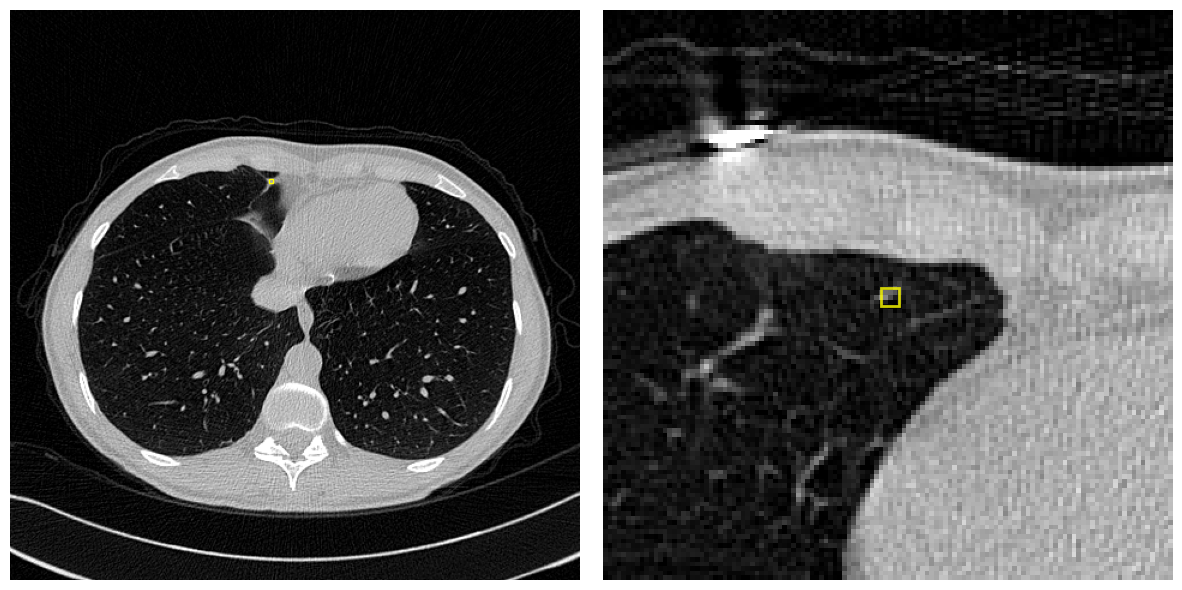

In [5]:
import pandas as pd
import numpy as np
import os


allNodules = pd.read_csv('allNods.csv')



LNDbv4_cts_nifti_resampled_dataset_list = os.listdir('/NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_cts_nifti_resampled/')
LNDbv4_cts_nifti_resampled_dataset_list

LNDbv4_cts_df = pd.DataFrame({'nifti_image':LNDbv4_cts_nifti_resampled_dataset_list})
LNDbv4_cts_df['detection_ct_path']  = 'LNDbv4_cts_nifti_resampled/'+LNDbv4_cts_df['nifti_image']
print(LNDbv4_cts_df['detection_ct_path'][0])
LNDbv4_cts_df['patientID'] = LNDbv4_cts_df['nifti_image'].str.split('-').str[-1].str.split('.nii.gz').str[0]
LNDbv4_cts_df['LNDbID'] = LNDbv4_cts_df['patientID'].astype(int)
LNDbv4_cts_df


allNodules_filtered = allNodules[allNodules['LNDbID'].isin(LNDbv4_cts_df['LNDbID'].tolist())].reset_index(drop=True)
allNodules_filtered = allNodules_filtered.dropna(subset=['x', 'y','z','DiamEq_Rad']).reset_index(drop=True)

allNodules_filtered["coordX"] = allNodules_filtered["x"]
allNodules_filtered["coordY"] = allNodules_filtered["y"]
allNodules_filtered["coordZ"] = allNodules_filtered["z"]
allNodules_filtered["w"] = allNodules_filtered["DiamEq_Rad"]
allNodules_filtered["h"] = allNodules_filtered["DiamEq_Rad"]
allNodules_filtered["d"] = allNodules_filtered["DiamEq_Rad"]

allNodules_filtered = allNodules_filtered.merge(LNDbv4_cts_df,on ='LNDbID',how='left')
allNodules_filtered = allNodules_filtered[allNodules_filtered['Nodule']=='0'].reset_index(drop=True)


#-| Import libraries
import numpy as np
import SimpleITK as sitk
import csv
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import math 
import pandas as pd
import numpy.ma as ma

##################################---Functions-------------#######################

def make_bold(text):
    return f"\033[1m{text}\033[0m"

#-| this function load an image using simpleITK and return 
#-|3D array, origin_numpy and spacing numpy
def load_itk_image(filename):
    '''
    this function load an image using simpleITK and return
    3D array, origin_numpy and spacing numpy
    input:  filename     = nifty CT image path eg."./CT_CTGRAV_TMP404180_4.nii.gz"
    output: numpyImage   = 3D CT numpy as slice X height x Width (z,y,x)
            numpyOrigin  = (z_origin,  y_origin,  x_origin)
            numpySpacing = (z_Spacing, y_Spacing, x_Spacing)
    '''
    itkimage = sitk.ReadImage(filename)           # load the ct image
    numpyImage = sitk.GetArrayFromImage(itkimage) # give CT to 3D numpy (z,y,x)
   
    #- When we load get the  itkimage.GetOrigin/GetSpacing it 
    # returns the array in order (x_origin, y_origin,z_origin)
    # as we loaded the CT image as 3D numpy (z,y,x) that is why
    # we also reversed the acquired spacing and origin
    numpyOrigin = np.array(list(reversed(itkimage.GetOrigin())))   # 3D numpy (z_origin,  y_origin,  x_origin)
    numpySpacing = np.array(list(reversed(itkimage.GetSpacing()))) # 3D numpy (z_Spacing, y_Spacing, x_Spacing)
    return numpyImage, numpyOrigin, numpySpacing

#-| this function will convert the world coordinate to the voxel coordinate
 #-|to visualize or acquired the bounding boxex on the 3D CT 
def worldToVoxelCoord(worldCoord, origin, spacing):
    stretchedVoxelCoord = np.absolute(worldCoord - origin)
    voxelCoord = stretchedVoxelCoord / spacing
    return voxelCoord

def normalize_image_to_uint8(image, lower_bound=-1000, upper_bound=500.0):
    """
    Clip the image to the lung window, then normalize it to uint8.
    Args:
        image: numpy array
        lower_bound: lower HU bound for the lung window (default: -1500 HU)
        upper_bound: upper HU bound for the lung window (default: -500 HU)
    """
    # Clip to lung window
    clipped_img = np.clip(image, lower_bound, upper_bound)
    
    # Normalize to [0, 255]
    normalized_img = ((clipped_img - lower_bound) / (upper_bound - lower_bound)) * 255.0
    normalized_img = normalized_img.astype(np.uint8)
    
    return normalized_img

def is_number_in_range(number, start, end):
    """
    Check if the number is within the range [start, end] (inclusive).
    
    Args:
    number (int/float): The number to check.
    start (int/float): The start of the range.
    end (int/float): The end of the range.
    
    Returns:
    bool: True if the number is within the range, False otherwise.
    """
    return start <= number <= end

#--------------- Reading CSV files--------------#
# Load the first CSV file
segValue      = 1
predM          = allNodules_filtered


raw_data_path = '/NAS/shared_data/for_VNLST/ft42/ct_public/LNDbv4/LNDbv4_cts_nifti_resampled'
#-| Import libraries

list_problematic_cases = []

# Get unique seriesuid values from the first CSV file
Final_dect = predM['LNDbID'].unique()

#- Demo running for only one sample due to github limitations
for dictonary_list_i in range(0, 1):#len(Final_dect)):
    
    print(make_bold('|' + '-'*30 + ' No={} '.format(dictonary_list_i+1) + '-'*30 + '|'))
    print('\n')

    desired_value      = Final_dect[dictonary_list_i]  # Get the seriesuid
    filtered_dpredM    = predM[predM['LNDbID'] == desired_value]
    example_dictionary = filtered_dpredM.reset_index()


    # Load the CT image
    print('Loading the Image:{}'.format(example_dictionary['LNDbID'][0]))
    print('Number of Annotations:{}'.format(len(example_dictionary)))



    filename    = example_dictionary['nifti_image'][0]
    ct_path     = os.path.join(raw_data_path, filename)

    ct_image  = sitk.ReadImage(ct_path)
    ct_array  = sitk.GetArrayFromImage(ct_image)
    spacing   = np.array(ct_image.GetSpacing()) # (x, y, z)
    origin    = np.array(ct_image.GetOrigin())
    direction = np.array(ct_image.GetDirection()).reshape(3, 3)

    for Which_box_to_use in range(0, len(example_dictionary)):

        #---------GT---Part
        worldCoord_gt = np.asarray([float(example_dictionary["coordX"][Which_box_to_use]), float(example_dictionary["coordY"][Which_box_to_use]), float(example_dictionary["coordZ"][Which_box_to_use])])
        voxelCoord_gt = ct_image.TransformPhysicalPointToIndex(worldCoord_gt)

        size_mm       = np.asarray([float(example_dictionary["w"][Which_box_to_use]), float(example_dictionary["h"][Which_box_to_use]), float(example_dictionary["d"][Which_box_to_use])])
        size          = size_mm // spacing[[0, 1, 2]]






        #--- Getting the bounding box start and end of the X (width)
        gtstart_x = int(voxelCoord_gt[0] - (size[0]//2))
        gtend_x   = int(voxelCoord_gt[0] + (size[0]//2))

        #--- Getting the bounding box start and end of the y
        gtstart_y = int(voxelCoord_gt[1] - (size[1]//2))
        gtend_y   = int(voxelCoord_gt[1] + (size[1]//2))

        #--- Getting the bounding box start and end of the z
        gtstart_z = int(voxelCoord_gt[2] - (size[2]//2))
        gtend_z   = int(voxelCoord_gt[2] + (size[2]//2))

        gtdraw_box_z = int(voxelCoord_gt[2])  # the z-slice we will visualize
        draw_img     = normalize_image_to_uint8(ct_array[gtdraw_box_z, :, :])
        #draw_img     = cv2.cvtColor(draw_img, cv2.COLOR_GRAY2BGR)


        # Create a figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        # Plot the full CT slice in the first subplot
        ax1.imshow(draw_img,  cmap='gray')

        ax1.add_patch(plt.Rectangle((gtstart_x, gtstart_y), 
                                    int(size[0]), 
                                    int(size[1]), fill=False, edgecolor='yellow', linewidth=1, alpha=1))
        #ax1.set_title('Full CT Slice')
        ax1.axis('off')

        # Extract a 32x32x32 cube around the bounding box
        cube_size = 124

        z_start = max(0, int(voxelCoord_gt[2]) - cube_size // 2)
        z_end   = min(ct_array.shape[0], z_start + cube_size)

        y_start = max(0, int(voxelCoord_gt[1]) - cube_size // 2)
        y_end   = min(ct_array.shape[1], y_start + cube_size)

        x_start = max(0, int(voxelCoord_gt[0]) - cube_size // 2)
        x_end   = min(ct_array.shape[2], x_start + cube_size)

        # Ensure the cube is 32x32x32 by padding if necessary
        cube = ct_array[z_start:z_end, y_start:y_end, x_start:x_end]
        if cube.shape != (cube_size, cube_size, cube_size):
            pad_z = max(0, cube_size - cube.shape[0])
            pad_y = max(0, cube_size - cube.shape[1])
            pad_x = max(0, cube_size - cube.shape[2])
            cube = np.pad(cube, ((0, pad_z), (0, pad_y), (0, pad_x)), mode='constant')

        # Display the middle slice of the cube in the second subplot
        middle_slice = cube[cube_size // 2, :, :]
        middle_slice = normalize_image_to_uint8(middle_slice)
        ax2.imshow(middle_slice, cmap='gray')
        #ax2.set_title('32x32x32 Cube (Middle Slice)')
        ax2.axis('off')

        # Adjust bounding box coordinates for the zoomed-in region
        adjusted_gtstart_x = gtstart_x - x_start
        adjusted_gtstart_y = gtstart_y - y_start


        # Draw bounding box on the zoomed-in image
        ax2.add_patch(plt.Rectangle((adjusted_gtstart_x, adjusted_gtstart_y), int(size[0]),int(size[1]), fill=False, edgecolor='yellow', linewidth=2, alpha=0.8))


        plt.tight_layout()        
        plt.show()
  